In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

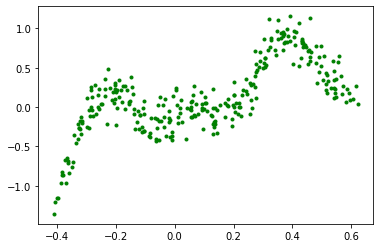

In [5]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.05, x.shape)*3
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [9]:
max_points = 20
lr=0.1
spline = tsp.Spline1D(2, x, y)
spline.n_max = max_points
# spline = tsp.Spline1D(max_points, x, y)

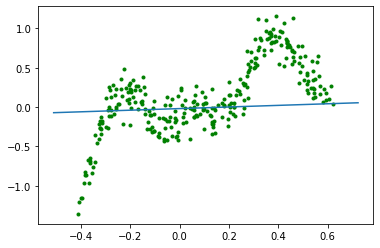

In [10]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y)

_______________________
Steps 0
Error 0.2044379956786195


_______________________
Steps 10
Error 0.16310343450615236


_______________________
Steps 20
Error 0.1376323264269319


_______________________
Steps 30
Error 0.12251450933147746


_______________________
Steps 40
Error 0.11357719305940085


_______________________
Steps 50
Error 0.10878735334814138


_______________________
Steps 60
Error 0.10667384793460606


_______________________
Steps 70
Error 0.10557728782765433


_______________________
Steps 80
Error 0.10503380668119398


_______________________
Steps 90
Error 0.10477229576768977


_______________________
Steps 100
Error 0.10464777794540674


_______________________
Steps 110
Error 0.09610739337418098


_______________________
Steps 120
Error 0.09102183604249116


_______________________
Steps 130
Error 0.08617092682294683


_______________________
Steps 140
Error 0.08248130545321836


_______________________
Steps 150
Error 0.07962013915366455


_____________________

TclError: invalid command name "."

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1530, in _draw
    def _draw(renderer): raise D

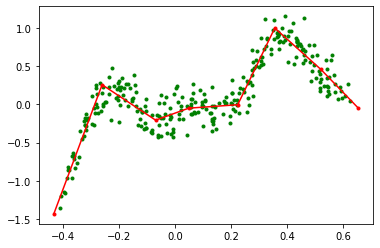

In [11]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):

#     Y = spline.forward(x) + x
    Y = spline.forward(x)
    
    dy = Y-y
    dx = spline.backward(dy)
#     dx = spline.backward(dy) + dy
    spline.update(lr)
    
    if step % 100 == 0:# and step!=0:
        spline._remove_close_points_()
        spline._combine_linear_points_()
        spline._remove_no_input_points_()
        spline._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
# spline.n_max +=1

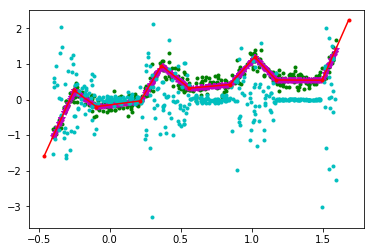

In [7]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
# Y = spline.forward(x) + x
Y = spline.forward(x)
plt.scatter(x, Y, marker='*', color='m')
plt.scatter(x, dx, marker='.', color='c')